# Fetching Data from DSE Website


In [15]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import lxml
import html5lib
from bs4 import BeautifulSoup

In [99]:
import seaborn as sns
sns.set()

In [90]:
import os
import time
import glob

## Get all the assets' name


In [86]:
instrument_file = 'instruments.csv'
try:
    assets_df = pd.read_csv(f'./data/{instrument_file}')
except:
    soup = BeautifulSoup(requests.get('https://www.dsebd.org/day_end_archive.php').content).find('select', {'name': 'inst'})
    assets = []
    for s in soup.find_all('option'):
        assets.append(s.text)
    assets_df = pd.DataFrame(assets[1:], columns=['instrument'])
    if not os.path.isfile(f'./data/{instrument_file}'):
        assets_df.to_csv(f'./data/{instrument_file}', index=False)


In [87]:
assets_df

,instrument
0,1JANATAMF
1,1STPRIMFMF
2,AAMRANET
3,AAMRATECH
4,ABB1STMF
...,...
385,WMSHIPYARD
386,YPL
387,ZAHEENSPIN
388,ZAHINTEX


In [92]:
data_dir = './data/instruments/'
for each in assets_df.values.flatten():
    file = f'{data_dir}{each}.csv'
    if os.path.isfile(file):
        print(f'{each} is skipped')
        continue
    html = requests.get(f'https://www.dsebd.org/day_end_archive.php?startDate=2019-08-21&endDate=2021-08-21&inst={each}&archive=data')
    soup = BeautifulSoup(html.content)
    table = soup.find('div', {'class': 'table-responsive'})
    df = pd.read_html(str(table))[0]
    print(f'{each} is saved!')
    df.to_csv(file)
    time.sleep(2)







1JANATAMF is skipped
1STPRIMFMF is skipped
AAMRANET is skipped
AAMRATECH is skipped
ABB1STMF is skipped
ABBANK is skipped
ACFL is skipped
ACI is skipped
ACIFORMULA is skipped
ACMELAB is skipped
ACTIVEFINE is saved!
ADNTEL is saved!
ADVENT is saved!
AFCAGRO is saved!
AFTABAUTO is saved!
AGNISYSL is saved!
AGRANINS is saved!
AIBL1STIMF is saved!
AIL is saved!
AL-HAJTEX is saved!
ALARABANK is saved!
ALIF is saved!
ALLTEX is saved!
AMANFEED is saved!
AMBEEPHA is saved!
AMCL(PRAN) is saved!
ANLIMAYARN is saved!
ANWARGALV is saved!
AOL is saved!
APEXFOODS is saved!
APEXFOOT is saved!
APEXSPINN is saved!
APEXTANRY is saved!
APOLOISPAT is saved!
APSCLBOND is saved!
ARAMIT is saved!
ARAMITCEM is saved!
ARGONDENIM is saved!
ASIAINS is saved!
ASIAPACINS is saved!
ATCSLGF is saved!
ATLASBANG is saved!
AZIZPIPES is saved!
BANGAS is saved!
BANKASIA is saved!
BARKAPOWER is saved!
BATASHOE is saved!
BATBC is saved!
BAYLEASING is saved!
BBS is saved!
BBSCABLES is saved!
BDAUTOCA is saved!
BDCOM is save

In [59]:
html = requests.get('https://www.dsebd.org/day_end_archive.php?startDate=2019-08-21&endDate=2021-08-21&inst=All%20Instrument&archive=data')
soup = BeautifulSoup(html.content)

In [60]:
table = soup.find('div', {'class': 'table-responsive'})
df = pd.read_html(str(table))[0]

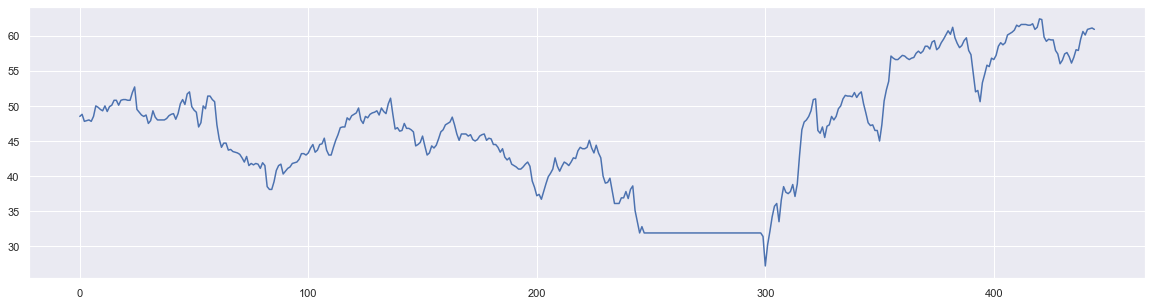

In [103]:
pd.read_csv('./data/instruments/BRACBANK.csv', index_col=0)['YCP'].plot(figsize=(20,5))
plt.show()

In [148]:
from datetime import datetime
symbol = 'BRACBANK'
df = pd.read_csv(f'./data/instruments/{symbol}.csv', parse_dates=['DATE'], index_col=0).iloc[:,1:]
df = df.loc[:, ['DATE', 'OPENP*', 'HIGH', 'LOW', 'CLOSEP*', 'VOLUME']]
df[::-1]

,DATE,OPENP*,HIGH,LOW,CLOSEP*,VOLUME
444,2019-08-21,60.8,62.3,60.8,61.1,731859
443,2019-08-22,61.0,61.8,60.8,61.0,240697
442,2019-08-25,61.5,62.4,60.8,60.9,379455
441,2019-08-26,60.9,60.9,60.0,60.1,344564
440,2019-08-27,60.5,61.1,60.3,60.6,733541
...,...,...,...,...,...,...
4,2021-08-12,48.0,48.5,47.8,47.9,1839447
3,2021-08-16,48.0,48.1,47.5,47.8,2857387
2,2021-08-17,48.7,49.3,48.0,48.8,1992866
1,2021-08-18,49.0,49.4,48.4,48.5,812749


In [130]:
from datetime import datetime
symbol = 'BRACBANK'
df = pd.read_csv(f'./data/instruments/{symbol}.csv', parse_dates=['DATE'], index_col=0).iloc[:,1:]
df = df.loc[:, ['DATE', 'OPENP*', 'HIGH', 'LOW', 'CLOSEP*', 'VOLUME']]


In [131]:
import json
with open('./data/data.json') as f:
    data = json.load(f)
    

In [145]:
df = pd.DataFrame(data['ohlcv'])
pd.to_datetime(df[0])

0      1970-01-01 00:25:43.572000
1      1970-01-01 00:25:43.575600
2      1970-01-01 00:25:43.579200
3      1970-01-01 00:25:43.582800
4      1970-01-01 00:25:43.586400
                  ...            
4195   1970-01-01 00:25:58.674000
4196   1970-01-01 00:25:58.677600
4197   1970-01-01 00:25:58.681200
4198   1970-01-01 00:25:58.684800
4199   1970-01-01 00:25:58.688400
Name: 0, Length: 4200, dtype: datetime64[ns]